# STFT→iSTFTでちゃんと音がもとに戻るのか確認してみた話

In [8]:
import wave
import scipy as sp
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

## ファイル名の定義

In [9]:
read_path = "datas/test.wav"
write_path = "datas/re_test.wav"

## ファイルの読み込みとSTFT

In [10]:
wave_file = wave.open(read_path, "r")

amp = 2 * np.sqrt(2)
length = 50000
fs = wave_file.getframerate()
time = np.arange(length) / float(fs)
x = wave_file.readframes(wave_file.getnframes())
wav_x = np.frombuffer(x, dtype= "int16")

f, t, Zxx = signal.stft(wav_x[:length], fs, nperseg=1000)

## STFT結果の可視化

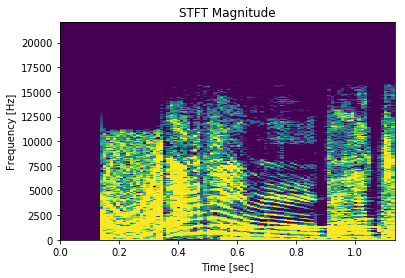

In [11]:
plt.pcolormesh(t, f, np.log(np.abs(Zxx)), vmin=0, vmax=amp)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

## iSTFTを実行する

In [12]:
Zxx = np.where(np.abs(Zxx) >= amp/10, Zxx, 0)
_, wav_xrec = signal.istft(Zxx, fs)
wav_xrec = np.array(wav_xrec, dtype=np.int16) # 戻しておかないとすごい音がする

## iSTFT結果の可視化と元シグナルの比較

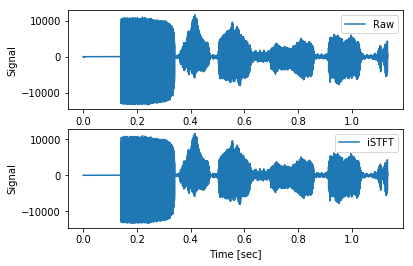

In [13]:
plt.subplot(211)
plt.plot(time, wav_x[:length])
plt.xlabel('Time [sec]')
plt.ylabel('Signal')
plt.legend(['Raw'])

plt.subplot(212)
plt.plot(time, wav_xrec)
plt.xlabel('Time [sec]')
plt.ylabel('Signal')
plt.legend(['iSTFT'])

plt.show()

## Waveファイルとして書き出し

In [14]:
write_wave = wave.Wave_write(write_path)
write_wave.setparams(wave_file.getparams())
write_wave.setnframes(length)
write_wave.writeframes(wav_x[:length])
write_wave.close()
wave_file.close()